In [1]:
import numpy as np
from nd2reader import ND2Reader
import matplotlib.pyplot as plt
import math
import skimage.io
import pdb
from scipy import fftpack
from myImageLib import dirrec
import trackpy as tp
import os
import time
from IPython.display import clear_output, display
"""
Routine image preprocess
    - Bandpass filter (implemented, but does not perform exactly the same as 
        the ImageJ FFT bandpass command. See ImageJ source code at 
        https://imagej.nih.gov/ij/plugins/fft-filter.html)
"""
def to8bit(img16):
    # if img16.dtype != 'uint16':
        # raise ValueError('16-bit grayscale image is expected')
    max = img16.max()
    min = img16.min()
    img8 = np.floor_divide(img16 - min , (max - min + 1) / 256)
    return img8.astype('uint8')    
def bpass(img8, low, high):
    def gen_filter(img, low, high):
        filt = np.zeros(img.shape)
        h, w = img.shape
        center = [int(w/2), int(h/2)]
        Y, X = np.ogrid[:h, :w]        
        dist = ((X - center[0])**2 + (Y-center[1])**2)**.5        
        filt[(dist>low)&(dist<=high)] = 1
        return filt
    filt = gen_filter(img8, low, high)
    filt = fftpack.ifftshift(filt)
    im_fft = fftpack.fft2(img8)
    im_fft_filt = im_fft * filt
    im_new = fftpack.ifft2(im_fft_filt).real
    im_new = im_new - im_new.min()
    im_new = np.floor_divide(im_new, (im_new.max()+1)/256)
    return im_new.astype('uint8')

In [2]:
# J:\DNA chains\2020_06_10
if __name__ == '__main__':
    folder = r'E:\Zhengyang\10042020'
    dirList = dirrec(folder, '*.nd2')
    for nd2Dir in dirList:
        # create folder
        dir, ext = os.path.splitext(nd2Dir)
        fol, fullname = os.path.split(nd2Dir)
        name, ext = os.path.splitext(fullname)
        if os.path.exists(dir) == False:
            os.mkdir(dir)
        imgStack = []
        with ND2Reader(nd2Dir) as images:
            clear_output(wait=True)
            print('Processing ' + nd2Dir)
            for num, image in enumerate(images):
#                 if num != 153:
#                     continue
                print('Page ' + str(num))
                img8 = to8bit(image)
#                 bp = bpass(img8, 5, 100)
                skimage.io.imsave(os.path.join(dir, '{:05}.tif'.format(num)), img8)
#                 imgStack.append(img_bpass)                
#         imgStack = np.array(imgStack)
#         skimage.io.imsave(os.path.join(dir, 'processed_img_1.tif'), imgStack)

Processing E:\Zhengyang\10042020\00.nd2
Page 0


KeyError: 796

In [3]:
d = r'G:\DNA chains\2020_08_24\thermal_fluctuation_1.nd2'
with ND2Reader(d) as images:
#     for num, image in enumerate(images):
     images[1]

C:\Users\ma000301\Anaconda3\lib\site-packages\nd2reader\common_raw_metadata.py:99: RuntimeWarning: Reported average frame interval (453.3 ms) doesn't match the set interval (1000.0 ms). Using the average now.
  warnings.warn(message % (avg_interval, interval), RuntimeWarning)


KeyError: 1633

In [2]:
d1 = r'E:\Zhengyang\08062020\00.nd2'
d2 = r'E:\Zhengyang\10042020\00.nd2'

In [3]:
i1 = ND2Reader(d1)
i2 = ND2Reader(d2)

S:\Anaconda\3\lib\site-packages\nd2reader\raw_metadata.py:171: UserWarning: Z-levels details missing in metadata. Using Z-coordinates instead.
  warnings.warn("Z-levels details missing in metadata. Using Z-coordinates instead.")
S:\Anaconda\3\lib\site-packages\nd2reader\common_raw_metadata.py:99: RuntimeWarning: Reported average frame interval (885.4 ms) doesn't match the set interval (1000.0 ms). Using the average now.
  warnings.warn(message % (avg_interval, interval), RuntimeWarning)


Frame([[576, 559, 574, ..., 667, 647, 675],
       [557, 541, 545, ..., 645, 646, 664],
       [573, 555, 557, ..., 663, 653, 656],
       ...,
       [102, 105, 106, ..., 110, 108, 109],
       [103, 106, 104, ..., 110, 110, 106],
       [102, 105, 104, ..., 108, 109, 108]], dtype=uint16)
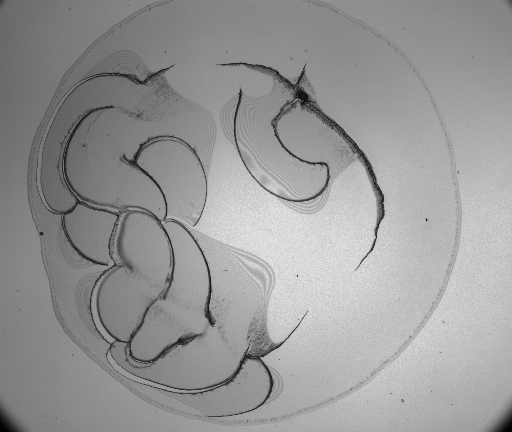

In [25]:
i2.get_frame_2D(z=700)

In [23]:
i2[1]

KeyError: 796

In [24]:
i2.get_frame_2D(t=1)

KeyError: 796

In [6]:
i2

<FramesSequenceND>
Axes: 4
Axis 'x' size: 2560
Axis 'y' size: 2160
Axis 't' size: 796
Axis 'z' size: 796
Pixel Datatype: <class 'numpy.float64'>

In [4]:
nd2Dir = 'J:\\1---drying_active_fluids\\10042020\\07.nd2'
with ND2Reader(nd2Dir) as images:
#     for num, image in enumerate(images):
     images[1]

C:\Users\ma000301\Anaconda3\lib\site-packages\nd2reader\common_raw_metadata.py:99: RuntimeWarning: Reported average frame interval (828.9 ms) doesn't match the set interval (1000.0 ms). Using the average now.
  warnings.warn(message % (avg_interval, interval), RuntimeWarning)


KeyError: 747

In [7]:
nd2Dir = r'D:\Data\10292019\0.nd2'
with ND2Reader(nd2Dir) as images:
    image = images[0]
plt.figure(figsize=(10,20))
plt.imshow(image, cmap='gray')

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\Data\\10292019\\04.nd2'

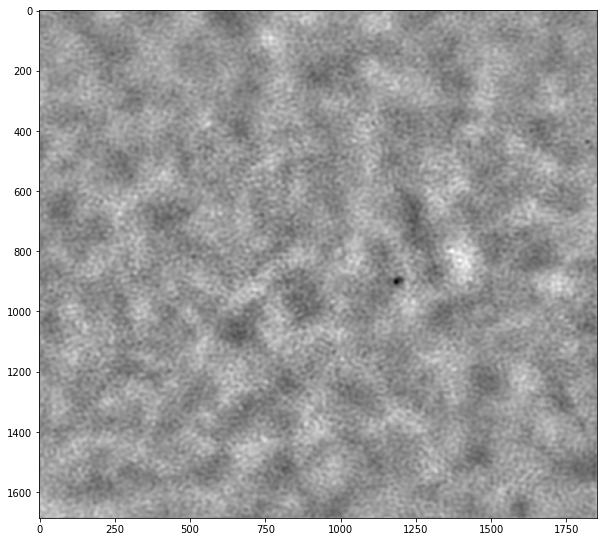

In [6]:
bp = bpass(to8bit(image), 5, 100)
plt.figure(figsize=(10,20))
plt.imshow(bp, cmap='gray')